In [1]:
# !pip install nasdaq-data-link
# import nasdaqdatalink

   ---------------------------------------- 0.0/57.0 kB ? eta -:--:--
   ---------------------------------------- 57.0/57.0 kB 995.2 kB/s eta 0:00:00


In [2]:
import nasdaqdatalink

In [ ]:
# import data from https://data.nasdaq.com/databases/ZILLOW
# warning: it has data size over 1.5 GB

In [16]:
import os
import pandas as pd
import numpy as np

cur_dir = %pwd
pkg_dir = os.path.dirname(cur_dir)
data_dir = os.path.join(pkg_dir, 'data')

var_df = pd.read_excel(os.path.join(data_dir, 'indicator.xlsx'))
region_df = pd.read_excel(os.path.join(data_dir, 'region.xlsx'))
zillow_df = pd.read_parquet(os.path.join(data_dir, 'zillow_data.parquet'))

In [9]:
# data = pd.read_csv(os.path.join(data_dir, 'zillow_data.csv'))
# data.to_parquet(os.path.join(data_dir, 'zillow_data.parquet'))

In [19]:
var_df.head(2)

,indicator_id,indicator,category
0,ZATT,ZHVI All Homes- Top Tier Time Series ($),Home values
1,ZSFH,ZHVI Single-Family Homes Time Series ($),Home values


In [22]:
region_df.head(2) #metro seems to be the cleanest

,region_id,region_type,region
0,394401,metro,"Boone, IA; IA"
1,274772,neigh,Northeast Dallas; TX; Dallas-Fort Worth-Arling...


In [21]:
zillow_df.head(2)

,indicator_id,region_id,date,value
0,ZATT,3101,1998-01-31,338849.0
1,ZATT,3101,1998-02-28,342993.0


# Test

In [23]:
region_df['region_type'].unique()

array(['metro', 'neigh', 'city', 'zip', 'state', 'county'], dtype=object)

In [26]:
region_df.loc[region_df['region'] == 'Alaska']

,region_id,region_type,region
1158,3,state,Alaska


In [35]:
cnd1 = zillow_df['region_id'] == 3
cnd2 = zillow_df['indicator_id'] == 'ZATT'
tdf = zillow_df.loc[cnd1 & cnd2]

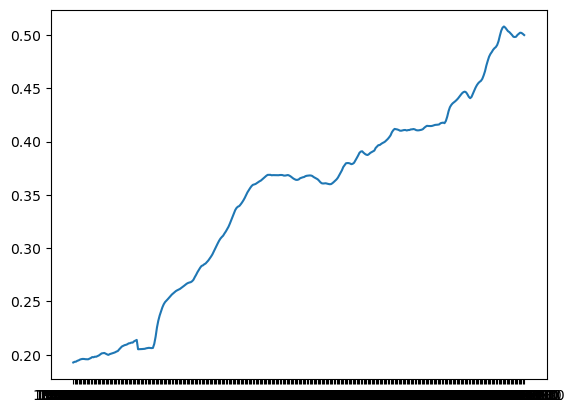

In [36]:
import matplotlib.pyplot as plt

tdf = tdf.sort_values(by = 'date')

plt.plot(tdf['date'], tdf['value']/1e6)